# Clase 19: Machine Learning

Explicar los conceptos y presentar un ejemplo en código de:

- Grupo 1: Slides 55 a 68
- Grupo 2: Slides 69 a 87
- Grupo 3: Slides 88 a 100

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline


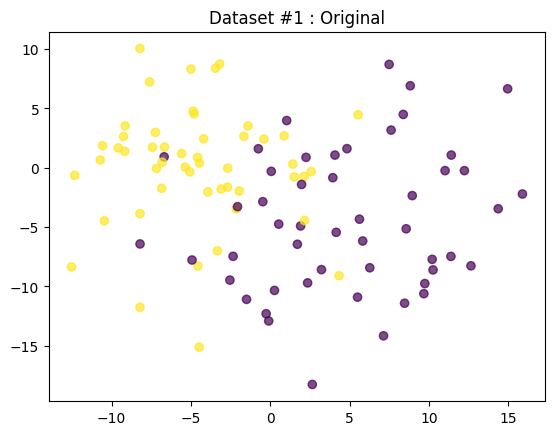

In [ ]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

# KMeans

In [ ]:
# Dataset #1 and two clusters / Instanciar el modelo
kmeans = KMeans(n_clusters=2,random_state=123, n_init='auto')

In [ ]:
# Ajuste del modelo
kmeans.fit(X1)

KMeans(n_clusters=2, n_init='auto', random_state=123)

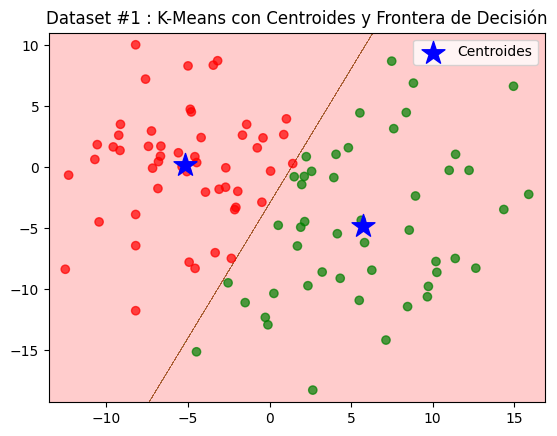

In [ ]:
# Instanciar el modelo KMeans para 2 clusters
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X1)  # Ajuste del modelo

# Define una paleta de colores: 0~2
myColors = {0: 'red', 1: 'green'}

# Crear una cuadrícula de puntos en el espacio de datos
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clasificación para cada punto en la cuadrícula
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión (línea divisoria)
plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'green'])

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7)

# Marcar los centroides como estrellas
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='blue', label='Centroides')

plt.title('Dataset #1 : K-Means con Centroides y Frontera de Decisión')
plt.legend()
plt.show()

# KMedoids

In [ ]:
%pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.9 MB/s eta 0:00:00


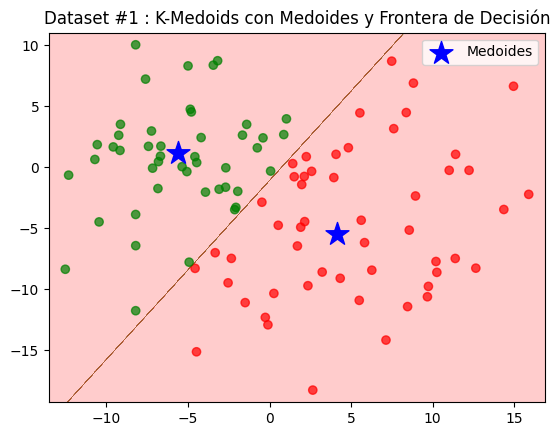

In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Instanciar el modelo KMedoids para 2 clusters
kmedoids = KMedoids(n_clusters=2, random_state=123)
kmedoids.fit(X1)  # Ajuste del modelo

# Define una paleta de colores: 0~2
myColors = {0: 'red', 1: 'green'}

# Crear una cuadrícula de puntos en el espacio de datos
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clasificación para cada punto en la cuadrícula
Z = kmedoids.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión (línea divisoria)
plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'green'])

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(kmedoids.labels_).apply(lambda x: myColors[x]), alpha=0.7)

# Marcar los medoides como estrellas
medoids = kmedoids.cluster_centers_
plt.scatter(medoids[:, 0], medoids[:, 1], marker='*', s=300, c='blue', label='Medoides')

plt.title('Dataset #1 : K-Medoids con Medoides y Frontera de Decisión')
plt.legend()
plt.show()


# DBSCAN

Advertencia: Hay más clusters que colores definidos en 'myColors'. Considera añadir más colores.


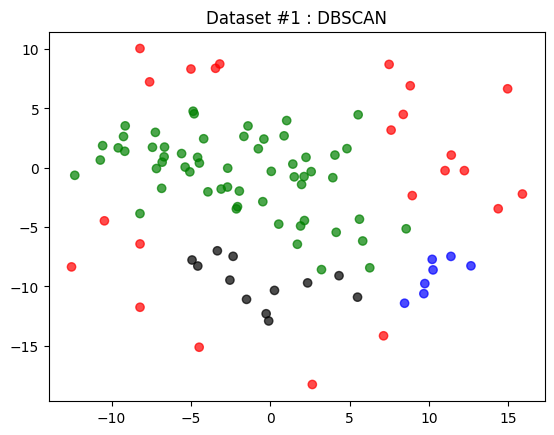

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Instanciar el modelo DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)

# Define una paleta de colores para los clusters: -1 (ruido), 0, 1
myColors = {-1: 'red', 0: 'green', 1: 'blue'}

# Verificar si hay más clusters que los definidos en myColors
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
if n_clusters > len(myColors) - 1:
    print("Advertencia: Hay más clusters que colores definidos en 'myColors'. Considera añadir más colores.")

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:, 0], X1[:, 1], c=pd.Series(dbscan.labels_).apply(lambda x: myColors.get(x, 'black')), alpha=0.7)

plt.title('Dataset #1 : DBSCAN')
plt.show()

# Gaussian Mixture Model (GMM)

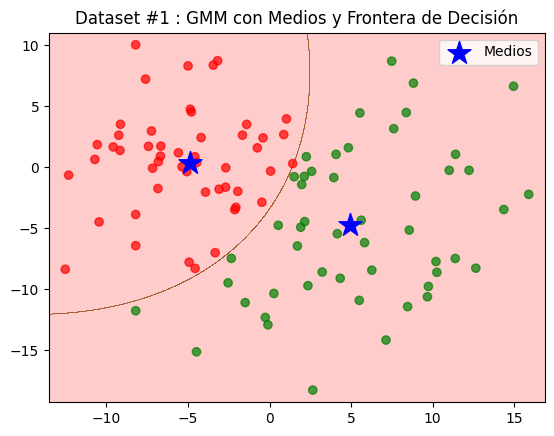

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Instanciar el modelo GMM para 2 componentes
gmm = GaussianMixture(n_components=2, random_state=123)
gmm.fit(X1)  # Ajuste del modelo

# Definir una paleta de colores: 0~2
myColors = {0: 'red', 1: 'green'}

# Crear una cuadrícula de puntos en el espacio de datos
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clasificación para cada punto en la cuadrícula
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión (línea divisoria)
plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'green'])

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(gmm.predict(X1)).apply(lambda x: myColors[x]), alpha=0.7)

# Marcar los centroides (medios) como estrellas
centroids = gmm.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='blue', label='Medios')

plt.title('Dataset #1 : GMM con Medios y Frontera de Decisión')
plt.legend()
plt.show()


# K-means, kmodes, and k-prototype

Ejemplos desde [link](https://medium.com/@reddyyashu20/k-means-kmodes-and-k-prototype-76537d84a669)

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


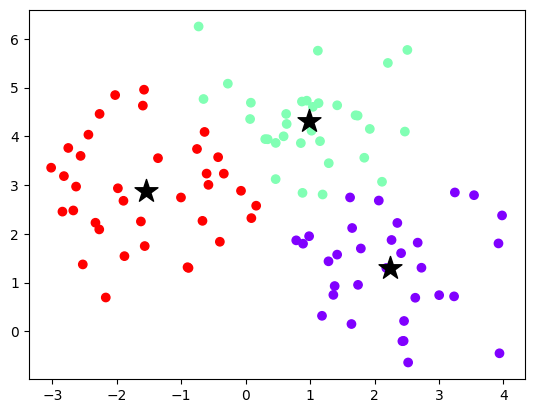

In [6]:
# Generate random data
X, y = make_blobs(n_samples=100, centers=3, random_state=0)
# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# Plot the results
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', s=300, c='black', label='Centroides')
plt.show()

In [8]:
%pip install kmodes

In [9]:
from kmodes.kmodes import KModes
import numpy as np

In [10]:
# Generate random categorical data
X = np.random.choice(4, (100, 4))
# Perform k-modes clustering
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(X)
# Print the resulting clusters
print(clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 188.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 28, cost: 169.0
Run 2, iteration: 2/100, moves: 4, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 21, cost: 168.0
Run 3, iteration: 2/100, moves: 4, cost: 168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11, cost: 174.0
Run 4, iteration: 2/100, moves: 1, cost: 174.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 36, cost: 175.0
Run 5, iteration: 2/100, moves: 2, cost: 175.0
Best run was number 3
[1 3 2 1 1 2 0 1 3 0 0 1 3 2 1 0 3 0 0 0 2 0 1 1 0 0 0 1 0 0 2 3 1 0 0 1 1
 0 3 0 3 0 3 2 1 1 1 1 2 0 0 1 0 0 0 0 0 3 0 3 0 0 0 0 0 1 1 3 1 2 3 0 0 1


Sample data:
  Feature1 Feature2 Feature3 Feature4
0        C        D        A        C
1        C        D        A        A
2        C        B        C        C
3        C        C        D        A
4        D        D        D        C
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 181.0
Run 1, iteration: 2/100, moves: 4, cost: 181.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17, cost: 194.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 195.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 17, cost: 189.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 20, cost: 176.0
Best run was number 5

Cluster assignment:
  Feature1 Feature2 Feature3 F

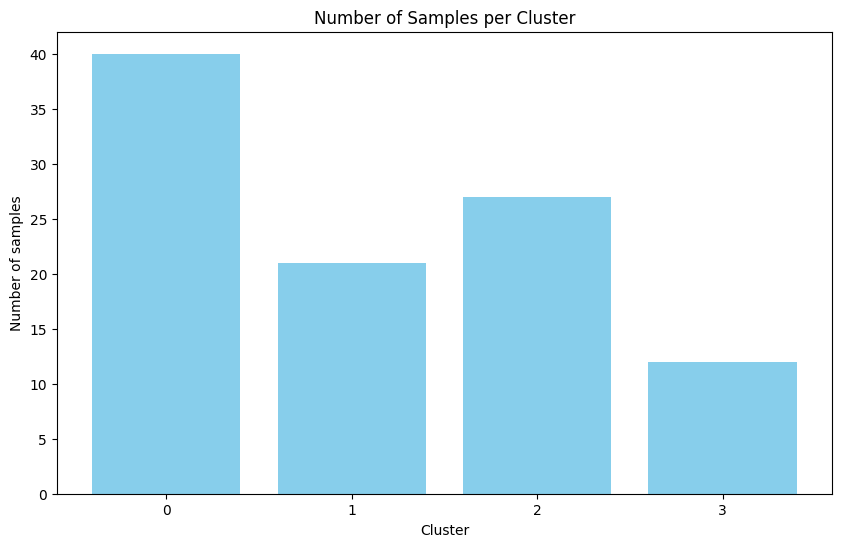

In [11]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Generate random categorical data
np.random.seed(42)  # For reproducibility
X = np.random.choice(['A', 'B', 'C', 'D'], (100, 4))

# Convert data to DataFrame for better readability
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
print("Sample data:")
print(df.head())

# Perform k-modes clustering
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Print the resulting clusters
print("\nCluster assignment:")
print(df.head())

# Print the cluster modes
print("\nCluster modes:")
for i, mode in enumerate(km.cluster_centroids_):
    print(f"Cluster {i}: {mode}")

# Optional: Plot the cluster distribution (only for visualization, not actual plot of categorical data)
plt.figure(figsize=(10, 6))
cluster_counts = df['Cluster'].value_counts()
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of samples')
plt.title('Number of Samples per Cluster')
plt.xticks(range(km.n_clusters))
plt.show()


In [12]:
from kmodes.kprototypes import KPrototypes
import numpy as np

In [13]:
# Generate random data with both numerical and categorical features
X = np.hstack((np.random.randn(100, 3), np.random.choice(4, (100, 1))))
# Define the indices of the numerical and categorical features
cat_cols = [3]
num_cols = [0, 1, 2]
# Perform k-prototype clustering
kp = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=1)
clusters = kp.fit_predict(X, categorical=cat_cols)
# Print the resulting clusters
print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 23, ncost: 208.9969891447504
Run: 1, iteration: 2/100, moves: 6, ncost: 205.789524571721
Run: 1, iteration: 3/100, moves: 3, ncost: 205.003284739289
Run: 1, iteration: 4/100, moves: 0, ncost: 205.003284739289
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 28, ncost: 216.88641844381334
Run: 2, iteration: 2/100, moves: 6, ncost: 214.75956936488393
Run: 2, iteration: 3/100, moves: 1, ncost: 214.6707684319571
Run: 2, iteration: 4/100, moves: 0, ncost: 214.6707684319571
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 18, ncost: 212.26787339422532
Run: 3, iteration: 2/100, moves: 9, ncost: 205.86106748844284
Run: 3, iteration: 3/100, moves: 2, ncost: 205.23412757754008
Run: 3, 

Sample data:
       Num1      Num2      Num3  Cat
0  0.496714 -0.138264  0.647689  0.0
1  1.523030 -0.234153 -0.234137  3.0
2  1.579213  0.767435 -0.469474  1.0
3  0.542560 -0.463418 -0.465730  0.0
4  0.241962 -1.913280 -1.724918  0.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 21, ncost: 167.03849619722664
Run: 1, iteration: 2/100, moves: 16, ncost: 156.8015372088661
Run: 1, iteration: 3/100, moves: 3, ncost: 156.2540448828842
Run: 1, iteration: 4/100, moves: 0, ncost: 156.2540448828842
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 25, ncost: 166.90794337363718
Run: 2, iteration: 2/100, moves: 10, ncost: 161.33393262360457
Run: 2, iteration: 3/100, moves: 5, ncost: 160.3544652599136
Run: 2, iteration: 4/100, moves: 0, ncost: 160.3544652599136
Init: initializing centroids
Init:

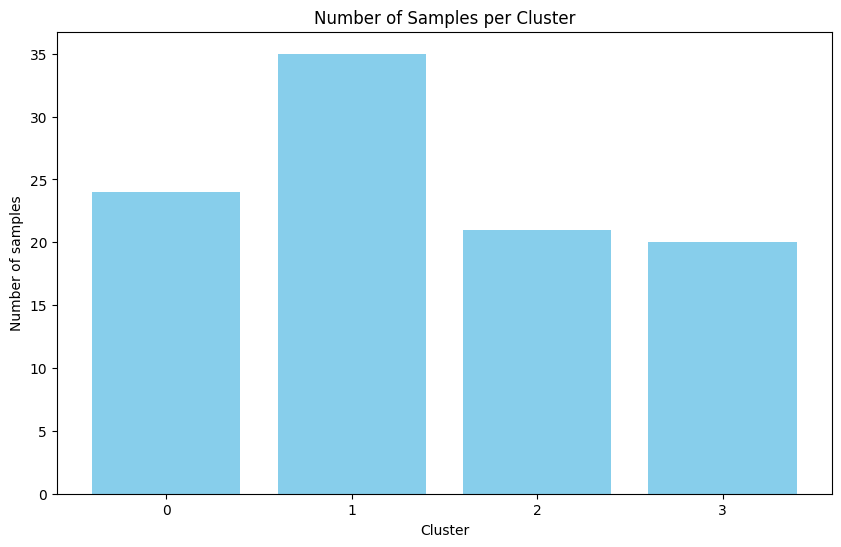

In [14]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

# Generate random data with both numerical and categorical features
np.random.seed(42)  # For reproducibility
num_data = np.random.randn(100, 3)  # Numerical features
cat_data = np.random.choice([0, 1, 2, 3], (100, 1))  # Categorical features
X = np.hstack((num_data, cat_data))

# Define the indices of the numerical and categorical features
cat_cols = [3]
num_cols = [0, 1, 2]

# Convert data to DataFrame for better readability
df = pd.DataFrame(X, columns=['Num1', 'Num2', 'Num3', 'Cat'])
print("Sample data:")
print(df.head())

# Perform k-prototype clustering
kp = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=1)
clusters = kp.fit_predict(X, categorical=cat_cols)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Print the resulting clusters
print("\nCluster assignment:")
print(df.head())

# Print the cluster centroids
print("\nCluster centroids:")
for i, centroid in enumerate(kp.cluster_centroids_):
    print(f"Cluster {i} centroid:")
    num_centroid = centroid[:len(num_cols)]
    cat_centroid = centroid[len(num_cols):]
    print(f"Numerical features: {num_centroid}")
    print(f"Categorical features: {cat_centroid}")

# Optional: Plot the cluster distribution (only for visualization)
plt.figure(figsize=(10, 6))
cluster_counts = df['Cluster'].value_counts()
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of samples')
plt.title('Number of Samples per Cluster')
plt.xticks(range(kp.n_clusters))
plt.show()


In [15]:
X

array([[ 0.49671415, -0.1382643 ,  0.64768854,  0.        ],
       [ 1.52302986, -0.23415337, -0.23413696,  3.        ],
       [ 1.57921282,  0.76743473, -0.46947439,  1.        ],
       [ 0.54256004, -0.46341769, -0.46572975,  0.        ],
       [ 0.24196227, -1.91328024, -1.72491783,  0.        ],
       [-0.56228753, -1.01283112,  0.31424733,  3.        ],
       [-0.90802408, -1.4123037 ,  1.46564877,  3.        ],
       [-0.2257763 ,  0.0675282 , -1.42474819,  2.        ],
       [-0.54438272,  0.11092259, -1.15099358,  0.        ],
       [ 0.37569802, -0.60063869, -0.29169375,  2.        ],
       [-0.60170661,  1.85227818, -0.01349722,  3.        ],
       [-1.05771093,  0.82254491, -1.22084365,  3.        ],
       [ 0.2088636 , -1.95967012, -1.32818605,  1.        ],
       [ 0.19686124,  0.73846658,  0.17136828,  0.        ],
       [-0.11564828, -0.3011037 , -1.47852199,  2.        ],
       [-0.71984421, -0.46063877,  1.05712223,  3.        ],
       [ 0.34361829, -1.